In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [2]:
df_can = pd.read_csv('https://cocl.us/datascience_survey_data', index_col=0)

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
df_can.head()

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136


In [3]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.3


In [4]:
df_can= df_can.sort_values(['Very interested'], ascending=False)
df_can.head()


,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136


In [5]:
df_can=(100. * df_can / 2233).round(0)
df_can.head()

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,76.0,20.0,3.0
Machine Learning,73.0,21.0,3.0
Data Visualization,60.0,33.0,5.0
Big Data (Spark / Hadoop),60.0,33.0,6.0
Deep Learning,57.0,34.0,6.0


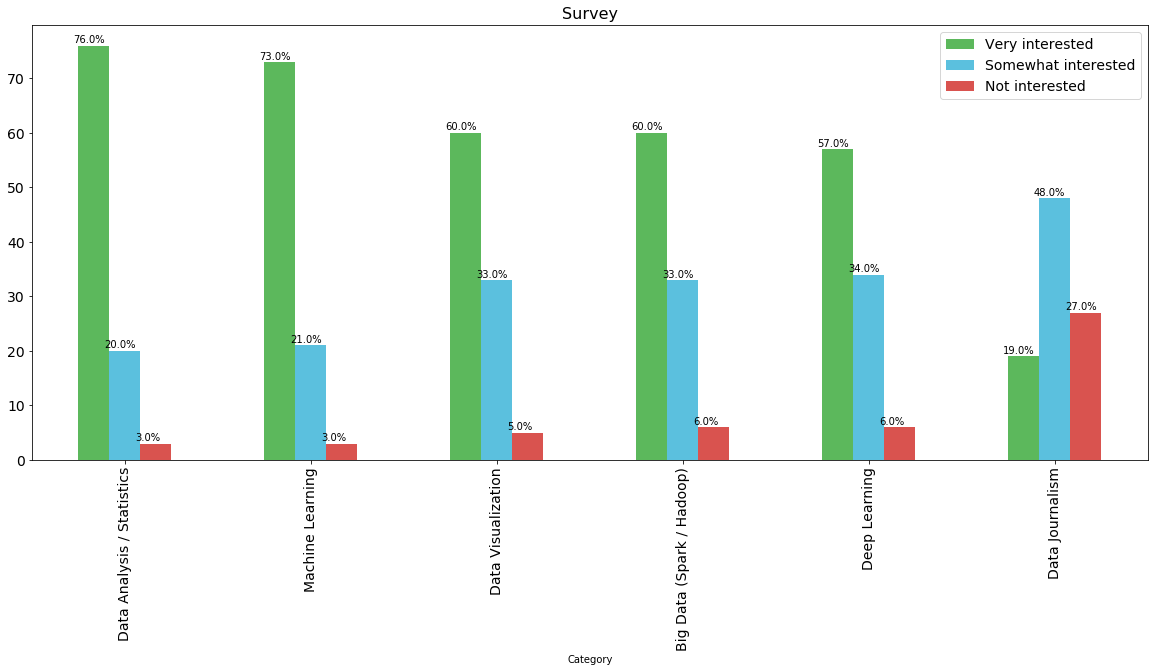

In [8]:
ax = df_can.plot(kind='bar', figsize=(20, 8), color=['#5cb85c', '#5bc0de', '#d9534f'], fontsize= 14)
plt.legend(fontsize = 14)
plt.title('Survey',fontsize=16)
plt.xlabel('Category')
ax.set_alpha(0.8)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
   # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
        #str(round((i.get_height()/total)*100, 2))+'%')
        str(round(i.get_height(), 2))+'%')
        

In [16]:
df_map = pd.read_csv('https://cocl.us/sanfran_crime_dataset', index_col=0)

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [17]:
df_map = pd.DataFrame(df_map['PdDistrict'].value_counts().astype(float))
df_map.to_json('crime_map.json')
df_map = df_map.reset_index()
df_map.columns = ['Neighborhood', 'Count']
 
df_map.head()

,Neighborhood,Count
0,SOUTHERN,28445.0
1,NORTHERN,20100.0
2,MISSION,19503.0
3,CENTRAL,17666.0
4,BAYVIEW,14303.0


In [18]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::anaconda==5.3.1=py37_0
  - defaults/linux-64::astropy==3.0.4=py37h14c3975_0
  - defaults/linux-64::bkcharts==0.2=py37_0
  - defaults/linux-64::blaze==0.11.3=py37_0
  - defaults/linux-64::bokeh==0.13.0=py37_0
  - defaults/linux-64::bottleneck==1.2.1=py37h035aef0_1
  - defaults/linux-64::dask==0.19.1=py37_0
  - defaults/linux-64::datashape==0.5.4=py37_1
  - defaults/linux-64::mkl-service==1.1.2=py37h90e4bf4_5
  - defaults/linux-64::numba==0.39.0=py37h04863e7_0
  - defaults/linux-64::numexpr==2.6.8=py37hd89afb7_0
  - defaults/linux-64::odo==0.5.1=py37_0
  - defaults/linux-64::pytables==3.4.4=py37ha205bf6_0
  - defaults/linux-64::pytest-arraydiff==0.2=py37h39e3cac_0
  - defaults/linux-64::pytest-astropy==0.4.0=py37_0
  - defaults/linux-64::pytest-doctestplus==0.1.3=py37_0
  - defaults/linux-64::pywavelets==1.0.0=py37h

In [23]:
# download countries geojson file
!wget --quiet  https://cocl.us/sanfran_geojson.json -O crime_map.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [26]:
crime_geo = r'crime_map.json' # geojson file

#calculating total number of incidents per district
#df_map = pd.DataFrame(df_map['PdDistrict'].value_counts().astype(float))
#df_map.to_json('crime_map.json')
#df_map = df_map.reset_index()
#df_map.columns = ['Neighborhood', 'Count']
# create a plain world map
sf_map = folium.Map(location=[37.7749, -122.4194], zoom_start=12, tiles='Mapbox Bright')

#sf_map.choropleth(
#    geo_data=crime_geo,
#    data=df_map,
#   columns=['Neighborhood', 'Count'],
#    key_on='feature.properties.Neighborhood',
#    fill_color='YlOrRd', 
#    fill_opacity=0.7, 
#    line_opacity=0.2,
#    legend_name='Number of incidents per district'
#)


# display map
sf_map